# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [187]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kwamevanleeuwen/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [188]:
# Read your api key environment variable
load_dotenv("sample.env")

Python-dotenv could not parse statement starting at line 5


True

In [189]:
# Create a newsapi client
from newsapi.newsapi_client import NewsApiClient
newsapi = NewsApiClient(api_key=os.environ["NEWS_API"])

In [190]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q="Bitcoin", sort_by="relevancy", language="en")

In [191]:
print(btc_news['articles'])

[{'source': {'id': 'the-verge', 'name': 'The Verge'}, 'author': 'Adi Robertson', 'title': 'India will reportedly introduce bill to make owning cryptocurrency illegal', 'description': 'India’s legislature is reportedly considering a near-total ban on private cryptocurrencies like Bitcoin or Ethereum, including owning the virtual currency. The government has discussed plans for a national digital currency as an alternative.', 'url': 'https://www.theverge.com/2021/3/15/22332677/india-cryptocurrency-trading-mining-possession-ban-law-report', 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/IdgNJaOIQBsN8QbQcH2MDU6sAUA=/0x243:2040x1311/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/10432811/mdoying_180308_2373_0091still.jpg', 'publishedAt': '2021-03-15T22:25:02Z', 'content': 'One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat… [+165

In [192]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q="Ethereum", sort_by="relevancy", language="en")

In [193]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()


,date,text,compound,positive,negative,neutral
0,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890
1,2021-03-16,The hacker behind last years big Twitter hack\...,-0.5106,0.000,0.142,0.858
2,2021-02-26,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887
3,2021-03-03,,0.0000,0.000,0.000,0.000
4,2021-02-25,TL;DR: Enter the The Complete Bitcoin (BTC) In...,0.8316,0.246,0.000,0.754


In [194]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-03-15,Famed auction house Christies just sold its fi...,0.0000,0.000,0.000,1.000
1,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890
2,2021-03-23,"Move fast, break things, get hacked.\r\nThat’s...",-0.4019,0.000,0.080,0.920
3,2021-03-16,Here's everything you need to know about non-f...,-0.1531,0.000,0.062,0.938
4,2021-03-18,OpenSea has been one of a handful of NFT marke...,0.4767,0.084,0.000,0.916


In [195]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.005180,0.046750,0.041700,0.861600
std,0.430775,0.073919,0.085443,0.232505
min,-0.906200,0.000000,0.000000,0.000000
25%,-0.062500,0.000000,0.000000,0.824250
50%,0.000000,0.000000,0.000000,0.935000
75%,0.025675,0.077750,0.023750,1.000000
max,0.831600,0.246000,0.326000,1.000000


In [196]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.102955,0.058400,0.034750,0.906900
std,0.394825,0.061774,0.047362,0.070001
min,-0.557400,0.000000,0.000000,0.754000
25%,-0.177325,0.000000,0.000000,0.880750
50%,0.012900,0.067000,0.000000,0.918500
75%,0.411525,0.085500,0.074000,0.938250
max,0.831600,0.246000,0.145000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had a barely higher mean positive sentiment score of 0.06 vs Bitcoin's 0.05

Q: Which coin had the highest compound score?

A: Ethereum also had a higher compound sentiment score of 0.10 (positive) vs Bitcoin's 0.01 (neutral)

Q. Which coin had the highest positive score?

A: Both Bitcoin and Ethereum had a maximum positive score of 0.25

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [197]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [198]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = {'stafffile', 'photo', 'reuters', 'illustration', 'ha'}
sw = sw.union(sw_addon)
sw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'ha',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'illustration',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'ou

In [199]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [200]:
# Create a new tokens column for Bitcoin
btc_tokens_column = []

for i in btc_news['articles']:
    btc_tokens_column += tokenizer(i['content'])

btc_tokens_column

['one',
 'strictest',
 'crackdown',
 'worldwidephoto',
 'michele',
 'doying',
 'vergeindia',
 'reportedly',
 'moving',
 'forward',
 'sweeping',
 'ban',
 'cryptocurrencies',
 'according',
 'country',
 'legislat',
 'char',
 'hacker',
 'behind',
 'last',
 'year',
 'big',
 'twitter',
 'hack',
 'sentenced',
 'hard',
 'timegraham',
 'ivan',
 'clark',
 'teenage',
 'hacker',
 'broke',
 'twitters',
 'system',
 'took',
 'verified',
 'account',
 'used',
 'char',
 'thing',
 'best',
 'left',
 'mystery',
 'least',
 'far',
 'coinbase',
 'concernedthe',
 'san',
 'franciscobased',
 'cryptocurrency',
 'exchange',
 'preparing',
 'go',
 'public',
 'since',
 'last',
 'year',
 'thursday',
 'pro',
 'char',
 'tldr',
 'enter',
 'complete',
 'bitcoin',
 'btc',
 'investment',
 'giveaway',
 'chance',
 'win',
 'cryptocurrencyrelated',
 'prizesthe',
 'bitcoin',
 'investment',
 'giveaway',
 'includes',
 'everything',
 'need',
 'get',
 'char',
 'new',
 'york',
 'cnn',
 'businessbitcoins',
 'roller',
 'coaster',
 'rid

In [201]:
# Create a new tokens column for Ethereum
eth_tokens_column = []

for i in eth_news['articles']:
    eth_tokens_column += tokenizer(i['content'])

eth_tokens_column

['famed',
 'auction',
 'house',
 'christies',
 'sold',
 'first',
 'purely',
 'digital',
 'piece',
 'art',
 'whopping',
 'million',
 'price',
 'buyer',
 'got',
 'digital',
 'file',
 'collage',
 'image',
 'complex',
 'legac',
 'char',
 'one',
 'strictest',
 'crackdown',
 'worldwidephoto',
 'michele',
 'doying',
 'vergeindia',
 'reportedly',
 'moving',
 'forward',
 'sweeping',
 'ban',
 'cryptocurrencies',
 'according',
 'country',
 'legislat',
 'char',
 'move',
 'fast',
 'break',
 'thing',
 'get',
 'hackedthats',
 'happened',
 'roll',
 'social',
 'currency',
 'platform',
 'allows',
 'creator',
 'mint',
 'distribute',
 'ethereumbased',
 'cryptocurrency',
 'known',
 'social',
 'char',
 'heres',
 'everything',
 'need',
 'know',
 'nonfungible',
 'token',
 'latest',
 'cryptocurrency',
 'crazeread',
 'full',
 'story',
 'learn',
 'even',
 'nfts',
 'opensea',
 'one',
 'handful',
 'nft',
 'marketplace',
 'explode',
 'popularity',
 'recent',
 'week',
 'collector',
 'wade',
 'trading',
 'nonfungible

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [202]:
from collections import Counter
from nltk import ngrams

In [203]:
# Generate the Bitcoin N-grams where N=2
bigrams_btc = ngrams(btc_tokens_column, n=2)
print(dict(bigrams_btc))

{'one': 'dollar', 'strictest': 'crackdown', 'crackdown': 'worldwidephoto', 'worldwidephoto': 'michele', 'michele': 'doying', 'doying': 'vergeindia', 'vergeindia': 'reportedly', 'reportedly': 'moving', 'moving': 'forward', 'forward': 'sweeping', 'sweeping': 'ban', 'ban': 'cryptocurrencies', 'cryptocurrencies': 'like', 'according': 'new', 'country': 'according', 'legislat': 'char', 'char': 'collection', 'hacker': 'broke', 'behind': 'last', 'last': 'year', 'year': 'thursday', 'big': 'twitter', 'twitter': 'hack', 'hack': 'sentenced', 'sentenced': 'hard', 'hard': 'timegraham', 'timegraham': 'ivan', 'ivan': 'clark', 'clark': 'teenage', 'teenage': 'hacker', 'broke': 'twitters', 'twitters': 'system', 'system': 'took', 'took': 'verified', 'verified': 'account', 'account': 'used', 'used': 'char', 'thing': 'best', 'best': 'left', 'left': 'mystery', 'mystery': 'least', 'least': 'far', 'far': 'coinbase', 'coinbase': 'american', 'concernedthe': 'san', 'san': 'francisco', 'franciscobased': 'cryptocur

In [204]:
# Generate the Ethereum N-grams where N=2
bigrams_eth = ngrams(eth_tokens_column, n=2)
print(dict(bigrams_eth))

{'famed': 'auction', 'auction': 'house', 'house': 'christies', 'christies': 'sold', 'sold': 'latest', 'first': 'purely', 'purely': 'digital', 'digital': 'content', 'piece': 'art', 'art': 'whopping', 'whopping': 'million', 'million': 'salesgetty', 'price': 'buyer', 'buyer': 'got', 'got': 'digital', 'file': 'collage', 'collage': 'image', 'image': 'complex', 'complex': 'legac', 'legac': 'char', 'char': 'band', 'one': 'popular', 'strictest': 'crackdown', 'crackdown': 'worldwidephoto', 'worldwidephoto': 'michele', 'michele': 'doying', 'doying': 'vergeindia', 'vergeindia': 'reportedly', 'reportedly': 'moving', 'moving': 'forward', 'forward': 'sweeping', 'sweeping': 'ban', 'ban': 'cryptocurrencies', 'cryptocurrencies': 'like', 'according': 'new', 'country': 'according', 'legislat': 'char', 'move': 'fast', 'fast': 'break', 'break': 'thing', 'thing': 'best', 'get': 'char', 'hackedthats': 'happened', 'happened': 'roll', 'roll': 'allowed', 'social': 'char', 'currency': 'platform', 'platform': 'ro

In [205]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [207]:
# Use token_count to get the top 10 words for Bitcoin

bigrams_btc = ngrams(btc_tokens_column, n=2)

top10_words_btc = token_count(btc_tokens_column, 10)
top10_bigrams_btc = token_count(bigrams_btc, 10)

print(f"Top-10 BTC words: {top10_words_btc}")
print()
print(f"Top-10 BTC bigrams: {top10_bigrams_btc}")      

Top-10 BTC words: [('char', 19), ('bitcoin', 12), ('virtual', 7), ('currency', 7), ('taken', 7), ('picture', 5), ('cryptocurrency', 4), ('exchange', 4), ('collection', 4), ('token', 4)]

Top-10 BTC bigrams: [(('virtual', 'currency'), 7), (('picture', 'taken'), 5), (('char', 'collection'), 4), (('collection', 'bitcoin'), 4), (('bitcoin', 'virtual'), 4), (('currency', 'token'), 4), (('token', 'displayed'), 4), (('displayed', 'picture'), 4), (('taken', 'dec'), 4), (('dec', 'reutersbenoit'), 4)]


In [209]:
# Use token_count to get the top 10 words for Ethereum
bigrams_eth = ngrams(eth_tokens_column, n=2)

top10_words_eth = token_count(eth_tokens_column, 10)
top10_bigrams_eth = token_count(bigrams_eth, 10)

print(f"Top-10 ETH words: {top10_words_eth}")
print()
print(f"Top-10 ETH bigrams: {top10_bigrams_eth}")      

Top-10 ETH words: [('char', 19), ('cryptocurrency', 9), ('new', 6), ('nfts', 5), ('week', 5), ('ethereum', 5), ('bitcoin', 5), ('digital', 4), ('million', 4), ('token', 4)]

Top-10 ETH bigrams: [(('nonfungible', 'token'), 3), (('char', 'nfts'), 3), (('everything', 'need'), 2), (('latest', 'cryptocurrency'), 2), (('kings', 'leon'), 2), (('cryptocurrency', 'platform'), 2), (('cryptocurrency', 'exchange'), 2), (('investment', 'giveaway'), 2), (('famed', 'auction'), 1), (('auction', 'house'), 1)]


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [211]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

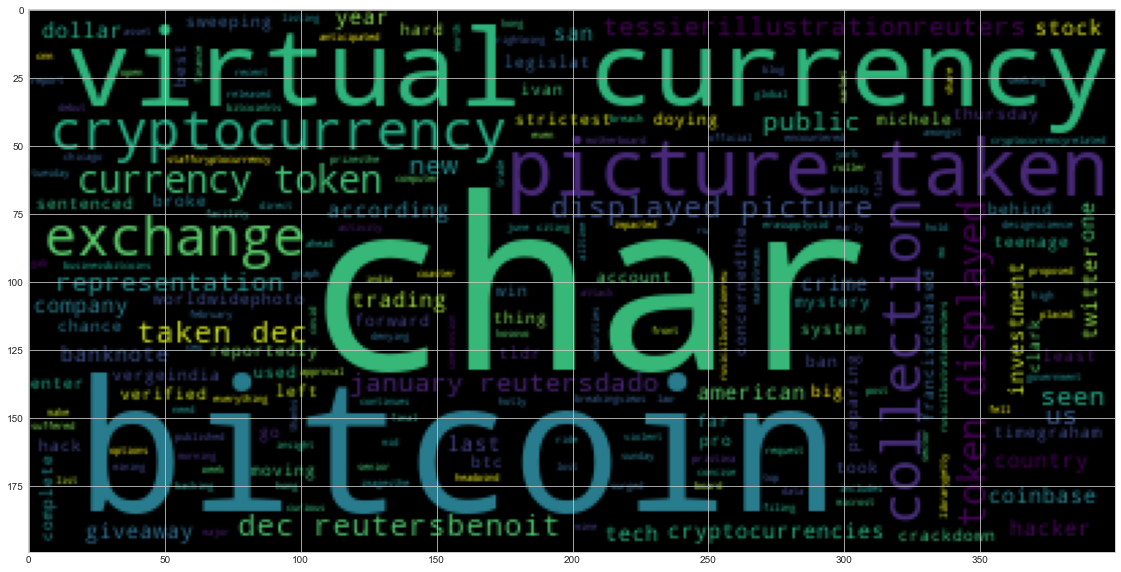

In [212]:
# Generate the Bitcoin word cloud
btc_string = ' '.join(btc_tokens_column)

wc = WordCloud().generate(btc_string)
plt.imshow(wc)

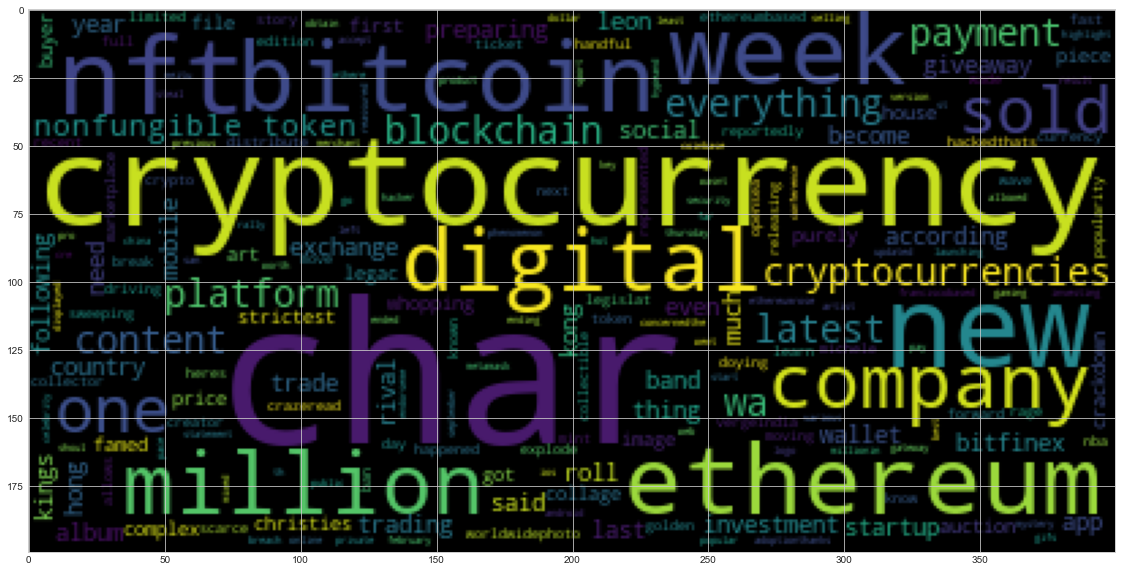

In [213]:
# Generate the Ethereum word cloud
eth_string = ' '.join(eth_tokens_column)

wc = WordCloud().generate(eth_string)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [214]:
import spacy
from spacy import displacy

In [215]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [216]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [218]:
# Concatenate all of the Bitcoin text together
btc_articles_text = ""

for article in btc_news['articles']:
    btc_articles_text += article['content']

print(type(btc_articles_text))

<class 'str'>


In [219]:
# Run the NER processor on all of the text
doc_btc = nlp(btc_articles_text)

for ent in doc_btc.ents:
    print(ent.text, ent.label_)
    
# Add a title to the document

One CARDINAL
Photo PERSON
Michele Doying PERSON
India GPE
Reuters ORG
last years DATE
Twitter PRODUCT
Graham Ivan Clark PERSON
Twitters NORP
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
over $12,000 MONEY
CNN ORG
above $58,000 MONEY
Sunday DATE
just above $46,000 MONEY
Tuesday DATE
India GPE
Reuters ORG
Coinbase WORK_OF_ART
American NORP
Reuters ORG
Dec. 8, 2017 DATE
Benoit Tessier/Illustration ORG
Reuters ORG
Reuters ORG
Bitcoin PERSON
January 21, 2021 DATE
Reuters ORG
Reuters ORG
Pristina GPE
Kosovo GPE
June 12, 2018 DATE
HONG KONG GPE
Reuters Breakingviews ORG
week of February DATE
North American NORP
Reuters ORG
Bitcoin PERSON
U.S. GPE
January 8, 2021 DATE
Dado Ru PERSON
Reuters ORG
Bitcoin PERSON
U.S. GPE
January 27, 2020 DATE
KTS Design/Science Photo Library/Getty Images ORG
The Chicago Board Options Exchange ORG
the US Securities and Exchange Commission ORG
2018 DATE
San Francisco GPE
Reuters ORG
Dec. 8, 2017 DATE
Benoit Tessier/Illustration ORG
Reuters ORG
Reute

In [220]:
# Render the visualization
displacy.render(doc_btc, style='ent')

In [221]:
# List all Entities
entities = [ent.text for ent in doc_btc.ents]
print(entities)

['One', 'Photo', 'Michele Doying', 'India', 'Reuters', 'last years', 'Twitter', 'Graham Ivan Clark', 'Twitters', 'Coinbase', 'San Francisco', 'last year', 'Thursday', 'over $12,000', 'CNN', 'above $58,000', 'Sunday', 'just above $46,000', 'Tuesday', 'India', 'Reuters', 'Coinbase', 'American', 'Reuters', 'Dec. 8, 2017', 'Benoit Tessier/Illustration', 'Reuters', 'Reuters', 'Bitcoin', 'January 21, 2021', 'Reuters', 'Reuters', 'Pristina', 'Kosovo', 'June 12, 2018', 'HONG KONG', 'Reuters Breakingviews', 'week of February', 'North American', 'Reuters', 'Bitcoin', 'U.S.', 'January 8, 2021', 'Dado Ru', 'Reuters', 'Bitcoin', 'U.S.', 'January 27, 2020', 'KTS Design/Science Photo Library/Getty Images', 'The Chicago Board Options Exchange', 'the US Securities and Exchange Commission', '2018', 'San Francisco', 'Reuters', 'Dec. 8, 2017', 'Benoit Tessier/Illustration', 'Reuters', 'Reuters', 'Dec. 8, 2017', 'Benoit Tessier/Illustration', 'Reuters', 'Reuters', 'Dec. 8, 2017', 'Benoit Tessier/Illustrati

---

### Ethereum NER

In [223]:
# Concatenate all of the Ethereum text together
eth_articles_text = ""

for article in eth_news['articles']:
    eth_articles_text += article['content']

print(type(eth_articles_text))

<class 'str'>


In [225]:
# Run the NER processor on all of the text
doc_eth = nlp(eth_articles_text)

for ent in doc_eth.ents:
    print(ent.text, ent.label_)

# Add a title to the document

Christies ORG
first ORDINAL
$69 million MONEY
5,000 CARDINAL
Photo PERSON
Michele Doying PERSON
India GPE
Reuters ORG
Ethereum ORG
here.)OpenSea GPE
NFT ORG
recent weeks DATE
these days DATE
Kings PERSON
NBA ORG
millions CARDINAL
Ethereum ORG
chars]MetaMask ORG
one CARDINAL
Ethereum ORG
September 2020 DATE
about $5.7 million MONEY
7.34% PERCENT
the week ending 21st February DATE
11.65% PERCENT
the previous week DATE
Ethereum ended ORG
the week DATE
1,935.57 MONEY
the week DATE
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
Bitfinex ORG
Bitfinex ORG
millions of dollars MONEY
Reuters ORG
Meitu ORG
Hong Kong GPE
China GPE
March 24, 2017 DATE
Bobby Yip PERSON
HONG KONG GPE
Reuters ORG
Hong Ko PERSON
more than a year ago DATE
Ethereum ORG
over $12,000 MONEY
Reuters ORG
BUCHAREST PERSON
Reuters ORG
this month DATE
Reuters ORG
SINGAPORE GPE
Feb 23 DATE
Reuters ORG
as much as 6% PERCENT
Asia LOC
Tuesday DATE
around $52,000 MONEY
India GPE
Reuters ORG
Kings ORG
Leon PRODUCT
more t

In [226]:
# Render the visualization
displacy.render(doc_eth, style='ent')

In [227]:
# List all Entities
entities = [ent.text for ent in doc_eth.ents]
print(entities)

['Christies', 'first', '$69 million', '5,000', 'Photo', 'Michele Doying', 'India', 'Reuters', 'Ethereum', 'here.)OpenSea', 'NFT', 'recent weeks', 'these days', 'Kings', 'NBA', 'millions', 'Ethereum', 'chars]MetaMask', 'one', 'Ethereum', 'September 2020', 'about $5.7 million', '7.34%', 'the week ending 21st February', '11.65%', 'the previous week', 'Ethereum ended', 'the week', '1,935.57', 'the week', 'Coinbase', 'San Francisco', 'last year', 'Thursday', 'Bitfinex', 'Bitfinex', 'millions of dollars', 'Reuters', 'Meitu', 'Hong Kong', 'China', 'March 24, 2017', 'Bobby Yip', 'HONG KONG', 'Reuters', 'Hong Ko', 'more than a year ago', 'Ethereum', 'over $12,000', 'Reuters', 'BUCHAREST', 'Reuters', 'this month', 'Reuters', 'SINGAPORE', 'Feb 23', 'Reuters', 'as much as 6%', 'Asia', 'Tuesday', 'around $52,000', 'India', 'Reuters', 'Kings', 'Leon', 'more than $2 million', 'Getty Images']


---